

# **Data Mining Final Project**
# PART 4:  Credit Card Fraud Detection: Model training- Random Forest Model

# **Introduction:**
# This notebook is dedicated to advanced data analysis for credit card fraud detection.
## The main steps include:
##1. Random forest model training
##2. Neural network model training ( Part 5 colab)
##3. Model performance comparison ( Part 5 colab)

# Step 1: Import necessary libraries


In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import warnings
warnings.filterwarnings('ignore')

# Step 2: Upload and Load SMOTE-processed Data and preporcessed test data


In [2]:
# Enable file upload in Google Colab
from google.colab import files
print("Please upload your SMOTE-processed training data (smote_processed_data.csv)")
uploaded_train = files.upload()

print("\nPlease upload your preprocessed test data (test_preprocessed.csv)")
uploaded_test = files.upload()

Please upload your SMOTE-processed training data (smote_processed_data.csv)


Saving smote_processed_data.csv to smote_processed_data.csv

Please upload your preprocessed test data (test_preprocessed.csv)


Saving test_preprocessed.csv to test_preprocessed.csv


# Load data

In [3]:
# 1. Load SMOTE-processed training data
train_smote = pd.read_csv('smote_processed_data.csv')
# 2. Load preprocessed test data (without SMOTE)
test_data = pd.read_csv('test_preprocessed.csv')

print("Dataset Information:")
print(f"SMOTE-processed training set shape: {train_smote.shape}")
print(f"Test set shape: {test_data.shape}")

Dataset Information:
SMOTE-processed training set shape: (363922, 30)
Test set shape: (56962, 30)


# Define features (X) and target (y)


In [4]:
# Define features (X) and target (y)
X_train = train_smote.drop(columns=['Class'])
y_train = train_smote['Class']

X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Fraud cases in training set: {y_train.sum()} ({y_train.mean()*100:.2f}%)")
print(f"Fraud cases in test set: {y_test.sum()} ({y_test.mean()*100:.2f}%)")

Training set shape: (363922, 29)
Test set shape: (56962, 29)
Fraud cases in training set: 181961 (50.00%)
Fraud cases in test set: 98 (0.17%)


In [5]:
# Ensure training and test sets have the same columns
common_columns = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_columns]
X_test = X_test[common_columns]

print(f"Number of common features: {len(common_columns)}")

Number of common features: 29


In [6]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Maximum depth of trees
    min_samples_split=10,      # Minimum samples required to split
    min_samples_leaf=4,        # Minimum samples in a leaf
    max_features='sqrt',       # Number of features to consider
    bootstrap=True,            # Use bootstrap samples
    class_weight='balanced',   # Handle class imbalance
    random_state=42,
    n_jobs=-1                  # Use all available cores
)


In [7]:
# Train the model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)

Training Random Forest model...


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10, n_jobs=-1,
                       random_state=42)

# Make predictions


In [11]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

In [12]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize top 10 important features


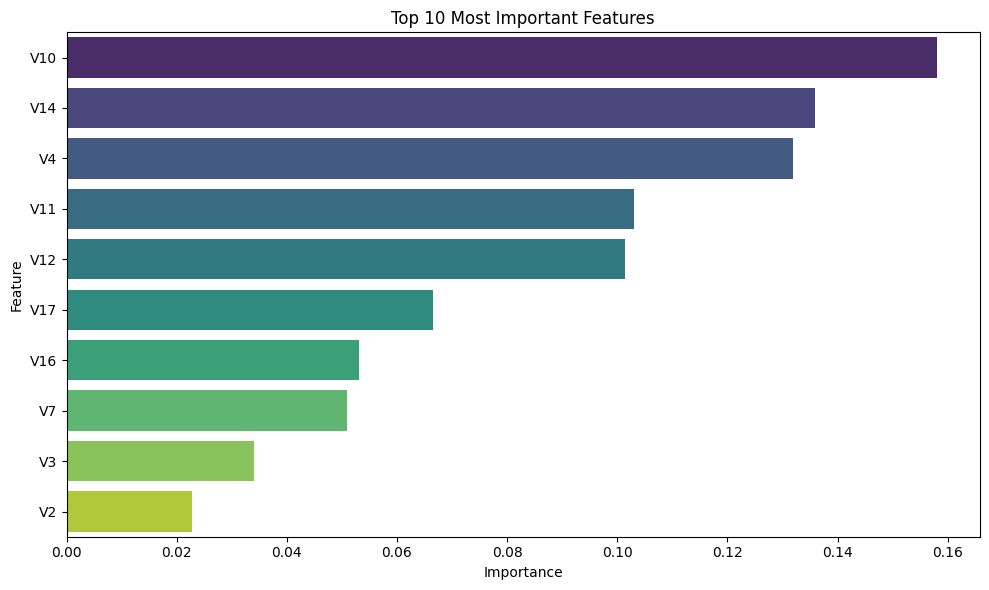


🔝 Top 10 Most Important Features:
   Feature  Importance
9      V10    0.157976
13     V14    0.135880
3       V4    0.131917
10     V11    0.102975
11     V12    0.101431
16     V17    0.066566
15     V16    0.053133
6       V7    0.051009
2       V3    0.034111
1       V2    0.022713


In [13]:
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n🔝 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Evaluate the model

In [14]:
# Evaluate the model
print("\n📊 Model Evaluation:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



📊 Model Evaluation:
Accuracy Score: 0.9979

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.85      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.92      0.79     56962
weighted avg       1.00      1.00      1.00     56962



# Create a comprehensive visualization dashboard


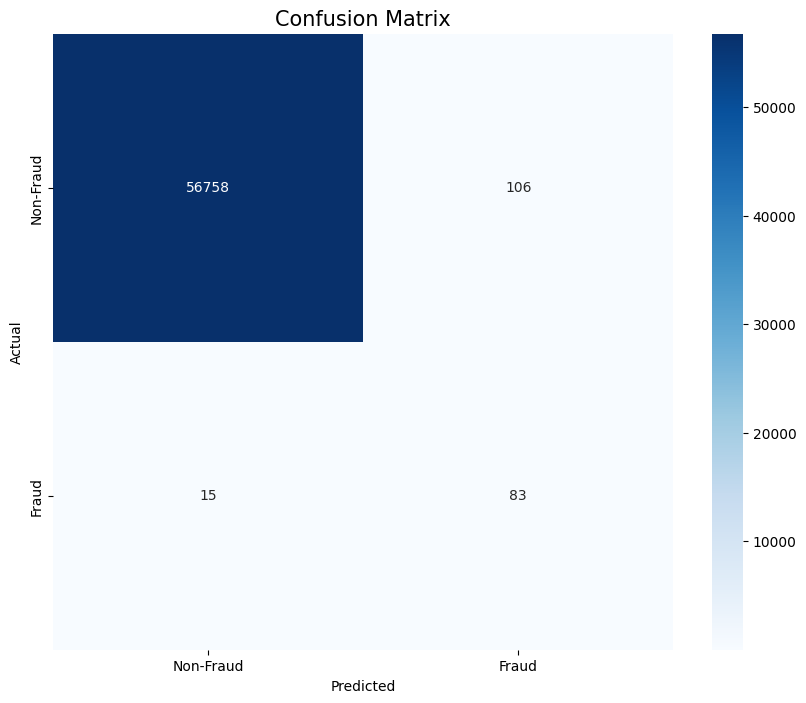

In [17]:
# Create individual visualizations instead of a complex dashboard
# This avoids potential gridspec issues

# 1. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# ROC Curve

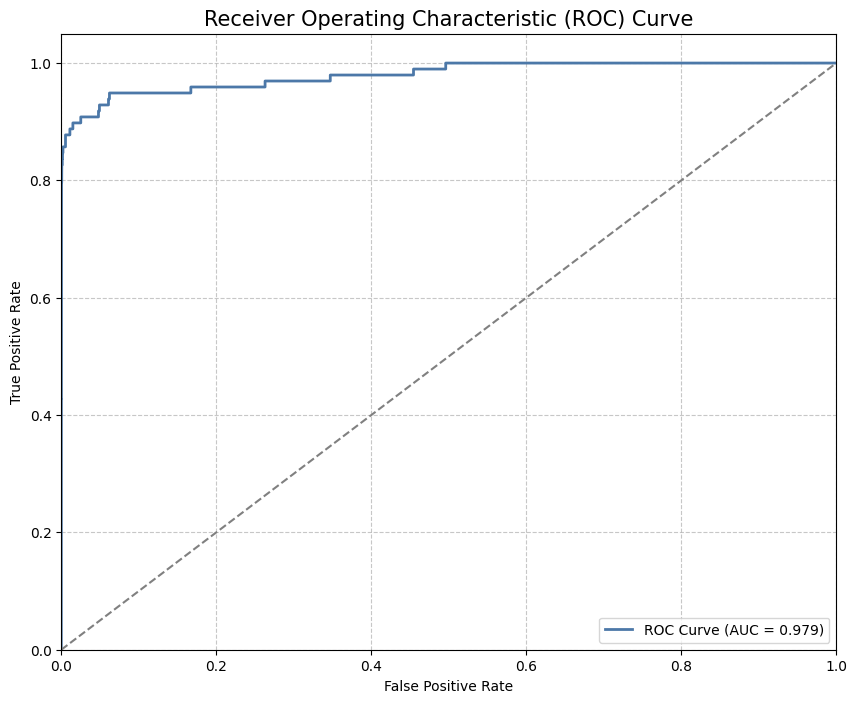

In [18]:
# 2. ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='#4c78a8', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

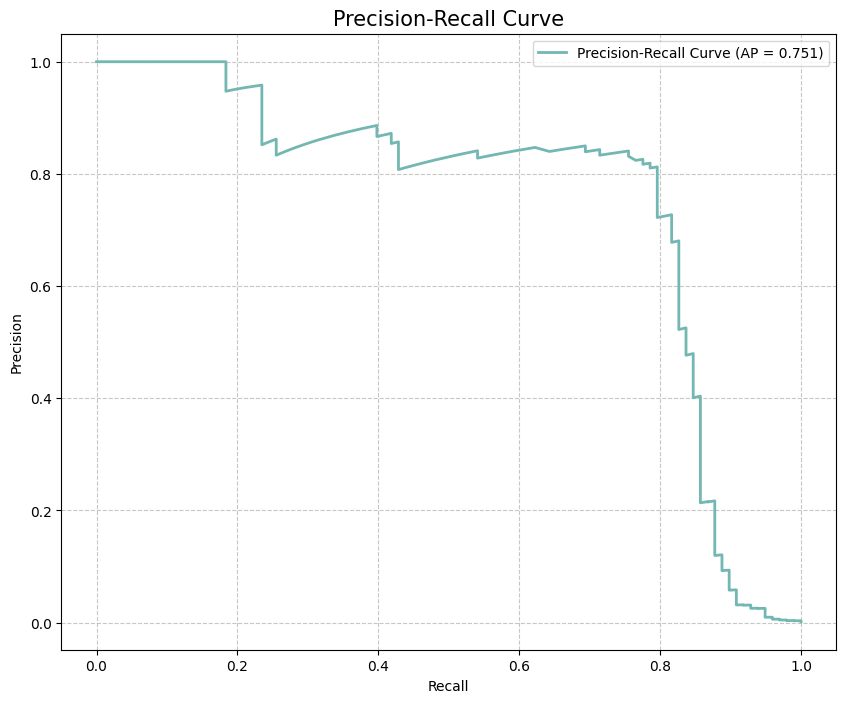

In [19]:
# 3. Precision-Recall Curve
plt.figure(figsize=(10, 8))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)
plt.plot(recall, precision, color='#72b7b2', lw=2,
         label=f'Precision-Recall Curve (AP = {avg_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=15)
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


--- Test Data Analysis ---
Number of fraud cases in test set: 98
Percentage of fraud cases in test set: 0.17%

--- Prediction Probabilities Analysis ---
Min prediction probability: 0.0008
Max prediction probability: 0.9997
Mean prediction probability: 0.0410
Median prediction probability: 0.0182


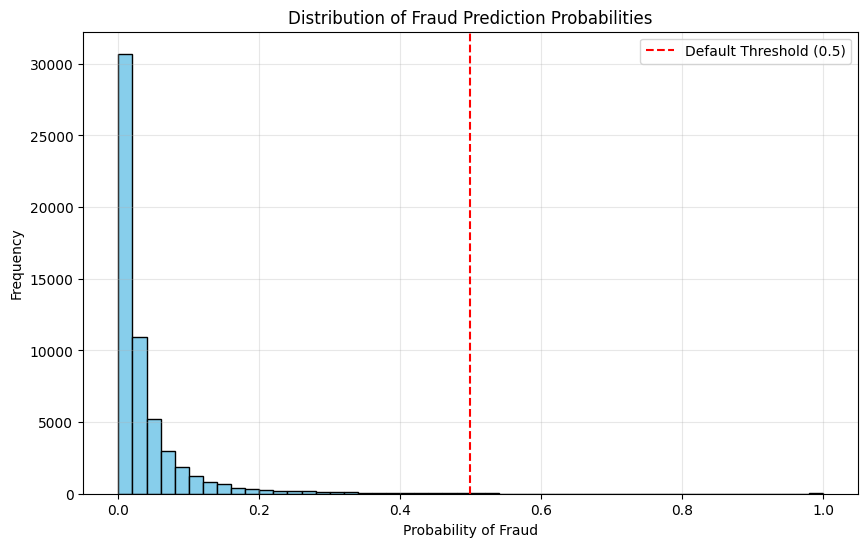

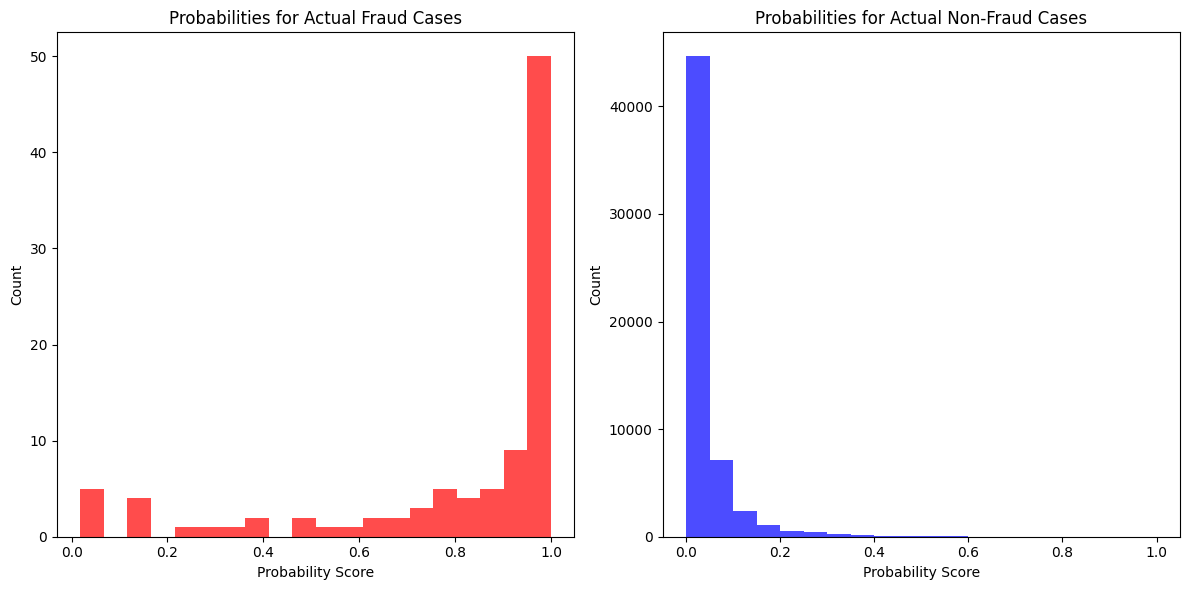

Mean probability for actual fraud cases: 0.8035
Mean probability for actual non-fraud cases: 0.0397

--- Default Threshold (0.5) Performance ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.85      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.92      0.79     56962
weighted avg       1.00      1.00      1.00     56962



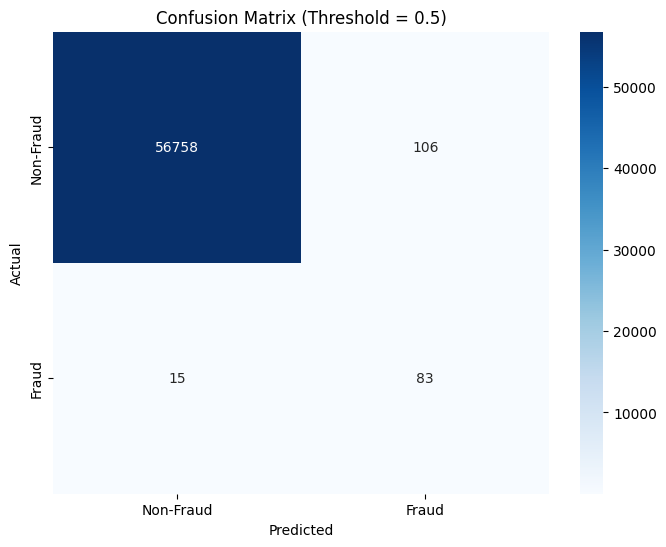


--- Finding Optimal Threshold ---


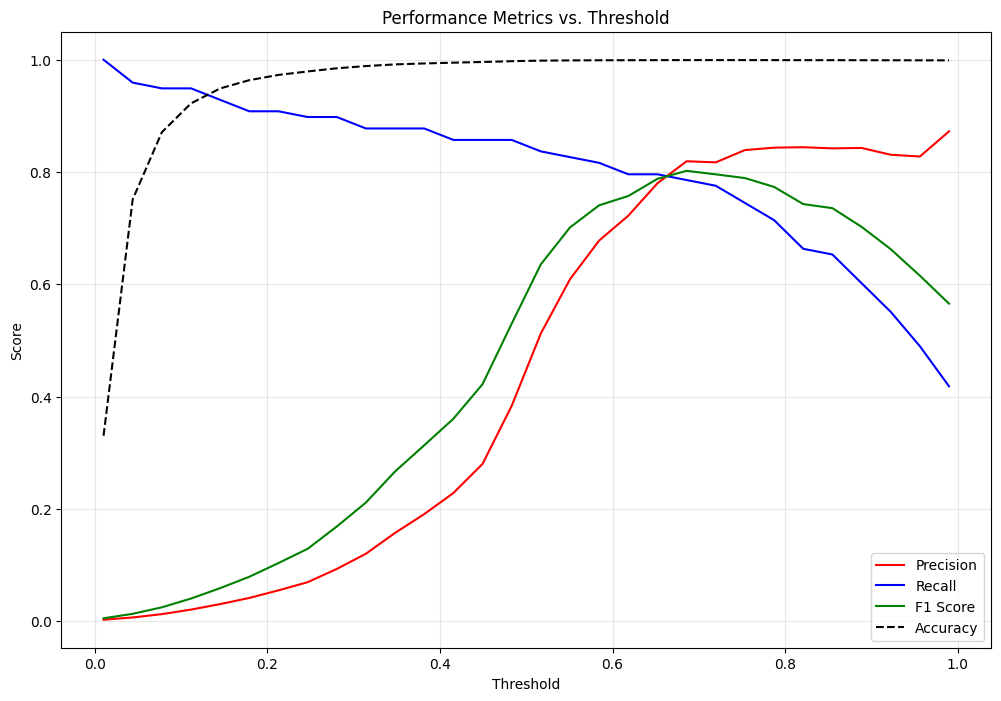

Optimal threshold for F1 Score: 0.6859 (F1 = 0.8021)

--- Performance at Optimal F1 Threshold ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



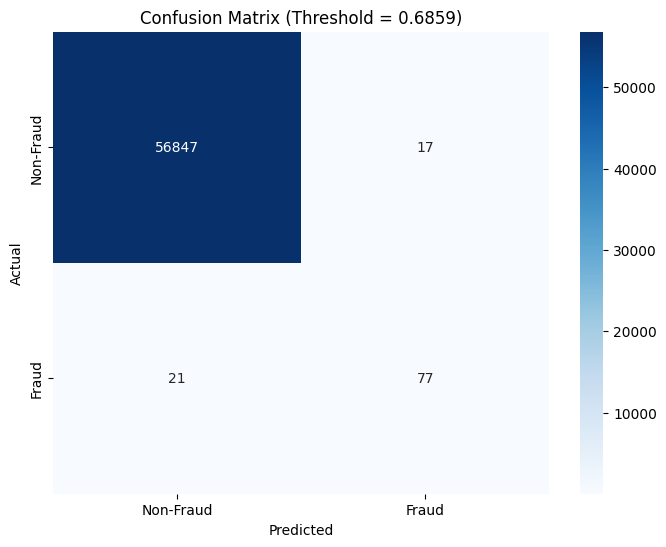


F1 Score at default threshold (0.5): 0.5784
F1 Score at optimal threshold (0.6859): 0.8021
Improvement: 38.67%


In [25]:
# Enhanced Threshold Optimization Section
# First, analyze the probabilities and class distribution

print("\n--- Test Data Analysis ---")
print(f"Number of fraud cases in test set: {np.sum(y_test)}")
print(f"Percentage of fraud cases in test set: {np.mean(y_test)*100:.2f}%")

print("\n--- Prediction Probabilities Analysis ---")
print(f"Min prediction probability: {np.min(y_pred_proba):.4f}")
print(f"Max prediction probability: {np.max(y_pred_proba):.4f}")
print(f"Mean prediction probability: {np.mean(y_pred_proba):.4f}")
print(f"Median prediction probability: {np.median(y_pred_proba):.4f}")

# Plot the distribution of prediction probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Fraud Prediction Probabilities')
plt.xlabel('Probability of Fraud')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Separate probabilities by actual class for better analysis
fraud_probs = y_pred_proba[y_test == 1]
non_fraud_probs = y_pred_proba[y_test == 0]

if len(fraud_probs) > 0 and len(non_fraud_probs) > 0:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(fraud_probs, bins=20, color='red', alpha=0.7)
    plt.title('Probabilities for Actual Fraud Cases')
    plt.xlabel('Probability Score')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    plt.hist(non_fraud_probs, bins=20, color='blue', alpha=0.7)
    plt.title('Probabilities for Actual Non-Fraud Cases')
    plt.xlabel('Probability Score')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    print(f"Mean probability for actual fraud cases: {np.mean(fraud_probs):.4f}")
    print(f"Mean probability for actual non-fraud cases: {np.mean(non_fraud_probs):.4f}")
else:
    print("Cannot create separate histograms - not enough samples in one or both classes")

# Calculate and display the default model performance (threshold=0.5)
default_preds = (y_pred_proba >= 0.5).astype(int)
print("\n--- Default Threshold (0.5) Performance ---")
print(classification_report(y_test, default_preds))

# Display confusion matrix for default threshold
plt.figure(figsize=(8, 6))
default_cm = confusion_matrix(y_test, default_preds)
sns.heatmap(default_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Threshold = 0.5)')
plt.show()

# Robust threshold optimization using various metrics
print("\n--- Finding Optimal Threshold ---")
# Define a range of thresholds to test
thresholds = np.linspace(0.01, 0.99, 30)

# Initialize lists to store metrics
results = []

# Calculate metrics at each threshold
for threshold in thresholds:
    y_pred_at_threshold = (y_pred_proba >= threshold).astype(int)

    # In case of no positive predictions or divide-by-zero
    try:
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_at_threshold).ravel()

        # Guard against division by zero
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Calculate accuracy
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        # Store all metrics
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'accuracy': accuracy,
            'tp': tp,
            'fp': fp,
            'tn': tn,
            'fn': fn
        })
    except Exception as e:
        print(f"Error at threshold {threshold:.2f}: {e}")

# Convert results to DataFrame for easier analysis
if results:
    results_df = pd.DataFrame(results)

    # Plot the metrics vs threshold
    plt.figure(figsize=(12, 8))

    plt.plot(results_df['threshold'], results_df['precision'], 'r-', label='Precision')
    plt.plot(results_df['threshold'], results_df['recall'], 'b-', label='Recall')
    plt.plot(results_df['threshold'], results_df['f1'], 'g-', label='F1 Score')
    plt.plot(results_df['threshold'], results_df['accuracy'], 'k--', label='Accuracy')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs. Threshold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Find optimal thresholds for different metrics
    best_f1_idx = results_df['f1'].idxmax()
    best_f1_threshold = results_df.loc[best_f1_idx, 'threshold']
    best_f1_score = results_df.loc[best_f1_idx, 'f1']

    print(f"Optimal threshold for F1 Score: {best_f1_threshold:.4f} (F1 = {best_f1_score:.4f})")

    # Check if F1 score is valid
    if best_f1_score > 0:
        # Get performance metrics at the optimal F1 threshold
        optimal_predictions = (y_pred_proba >= best_f1_threshold).astype(int)

        print("\n--- Performance at Optimal F1 Threshold ---")
        print(classification_report(y_test, optimal_predictions))

        # Plot confusion matrix at optimal threshold
        plt.figure(figsize=(8, 6))
        optimal_cm = confusion_matrix(y_test, optimal_predictions)
        sns.heatmap(optimal_cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Non-Fraud', 'Fraud'],
                    yticklabels=['Non-Fraud', 'Fraud'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix (Threshold = {best_f1_threshold:.4f})')
        plt.show()

        # Calculate default F1 score manually instead of using f1_score function
        tn_default, fp_default, fn_default, tp_default = confusion_matrix(y_test, default_preds).ravel()
        default_precision = tp_default / (tp_default + fp_default) if (tp_default + fp_default) > 0 else 0
        default_recall = tp_default / (tp_default + fn_default) if (tp_default + fn_default) > 0 else 0
        default_f1 = 2 * (default_precision * default_recall) / (default_precision + default_recall) if (default_precision + default_recall) > 0 else 0

        # Compare with optimal threshold
        improvement = (best_f1_score - default_f1) / default_f1 * 100 if default_f1 > 0 else float('inf')

        print(f"\nF1 Score at default threshold (0.5): {default_f1:.4f}")
        print(f"F1 Score at optimal threshold ({best_f1_threshold:.4f}): {best_f1_score:.4f}")
        print(f"Improvement: {improvement:.2f}%")
    else:
        print("Could not find valid F1 scores. Using default threshold (0.5).")
        print("This often happens with highly imbalanced test sets or when the model doesn't discriminate well.")
else:
    print("Could not calculate metrics across thresholds. Check for data issues or model problems.")